In [1]:
# import libraries
# Always run this cell first!
import numpy as np
import pandas as pd

import scipy
import statsmodels.api # appear to need to import the api as well as the library itself for the interpreter to find the modules
import statsmodels as sm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go
import plotly.offline
plotly.offline.init_notebook_mode(connected=True) # make plotly work with Jupyter Notebook using CDN

# JNB Lab Solutions

In [3]:
framingham = pd.read_csv("framingham.csv")

,AGE,SYSBP,DIABP,TOTCHOL,CURSMOKE,DIABETES,GLUCOSE,DEATH,ANYCHD
0,39,106.0,70.0,195.0,0,0,77.0,0,1
1,46,121.0,81.0,250.0,0,0,76.0,0,0
2,48,127.5,80.0,245.0,1,0,70.0,0,0
3,61,150.0,95.0,225.0,1,0,103.0,1,0
4,46,130.0,84.0,285.0,1,0,85.0,0,0


## Part 1: Explore the data

1. Write a line or two of code to figure out how many people in the study have an occurrence of CHD and how many do not.

There are 954 people in the study with CHD and 2888 without CHD.

In [60]:
# Solution 1.1
print(chd.shape[0], nochd.shape[0])

954 2888


```{index} histogram
```

2. Make a histogram of the cholesterol levels for both samples. Describe the distributions' centers, shapes, and compare the two.

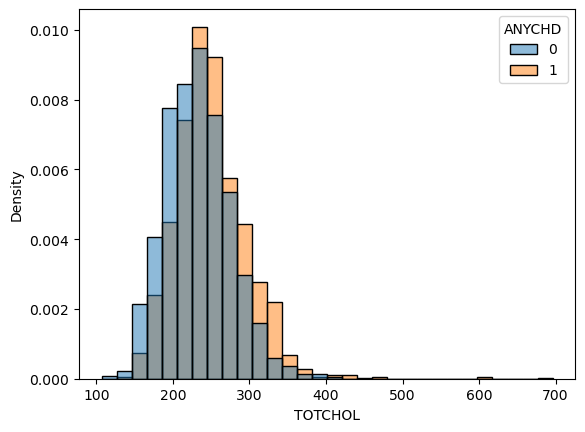

In [84]:
# Solution 1.2
sns.histplot(
    data=framingham,
    x='TOTCHOL',
    hue='ANYCHD',
    stat='density',
    common_norm=False,
    bins=30
);

```{index} t-test; two-sample
```

## Part 2: Two Sample T-tests

1. Describe the assumptions of the T-test and comment on if they are valid for this example. Your work in Part 1 should be enough.

The t-test is valid since we have a large sample size in both samples ($n_1 = 945$ and $n_2 = 2888$), and both sample distributions are relatively mound shaped.

2. Compute the test statistic and $P$-value using `cm.ttest_ind`. 

In [58]:
# Solution
sample1 = chd['TOTCHOL']
sample2 = nochd['TOTCHOL']

# create a CompareMeans object from the two samples
cm = sm.stats.weightstats.CompareMeans.from_data(sample1, sample2)

(stat, pval, df) = cm.ttest_ind(
    value = 0, # null hypothesis: difference in means is 0
    alternative = 'two-sided', # two-sided alternative hypothesis
    usevar = 'unequal', # perform Welch's t-test
)

print(f'Results of T-test: test statistic is {stat:.3f} with {df:.3f} degrees of freedom.\nP-value is {pval:.3f}.')

Results of T-test: test statistic is 9.766 with 1545.774 degrees of freedom.
P-value is 0.000.


3. Write your conclusion in a complete sentence.

Solution: Our test yields a test statistic of 9.766 on 1545.774 degrees of freedom, with a p-value of 0. Thus, we reject the null hypothesis that the average total cholesterol levels are the same in both populations. 

4. Give a confidence interval for the difference in average total cholesterol.

Solution: A 95% confidence interval for the difference is (13.295, 19.977), meaning that we are 95% confident that average cholesterol levels are (roughly) 13 to 20 points higher in patients with CHD.

```{index} confidence intervals
```

In [61]:
conflevel = 0.95

# compute confidence interval, using the same CompareMeans object as before
(lower, upper) = cm.tconfint_diff(
    alpha = 1-conflevel,
    alternative = 'two-sided',
    usevar = 'unequal', # perform Welch's t-test
)
print(f'{int(conflevel*100)}% confidence interval is ({lower:.3f}, {upper:.3f}).')

95% confidence interval is (13.295, 19.977).
